In [14]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2
from scipy import ndimage
from scipy import stats
import os
import cvutils as cvu
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# Тука ја дефинираме првата функција за Матеа
тоа е едноставна функција која што печати само `Матеа`

In [15]:
def im_log_transformation(im):
    im = cvu.norm(im, a_new=0, b_new=1)
    return np.log2(im + 1) * 255

In [16]:
def for_matea():
    print("Matea")

0


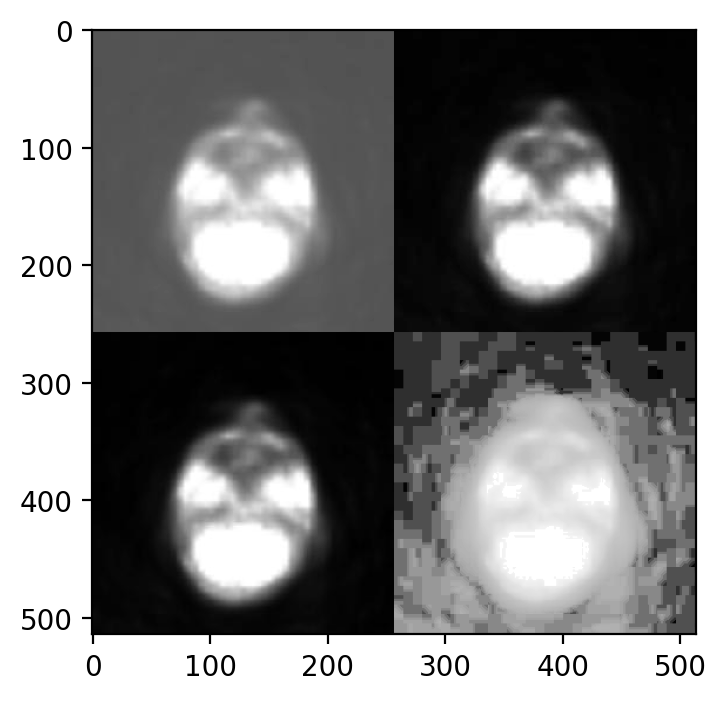

In [17]:
skull_im = cv2.imread('./images/contrast/skull1.jpeg', cv2.IMREAD_GRAYSCALE)
skull_pre_norm_im = cv2.imread('./images/contrast/skull1-contrast-normalized.jpeg', cv2.IMREAD_GRAYSCALE)

print(np.min(skull_pre_norm_im))
# skull_norm_im = (skull_im - skull_im.min()) * (254 / (skull_im.max() - skull_im.min())).astype(np.int)
skull_norm_im = cvu.norm(skull_im)
skull_hist_equ_im = cvu.hist_equalization(skull_norm_im.astype(np.int32))
skull_norm_diff_im = skull_pre_norm_im - skull_norm_im
skull_final_im = cvu.concatenate([skull_im, skull_norm_im, skull_pre_norm_im, skull_hist_equ_im], (2, 2))
plt.imshow(skull_final_im, cmap='gray')

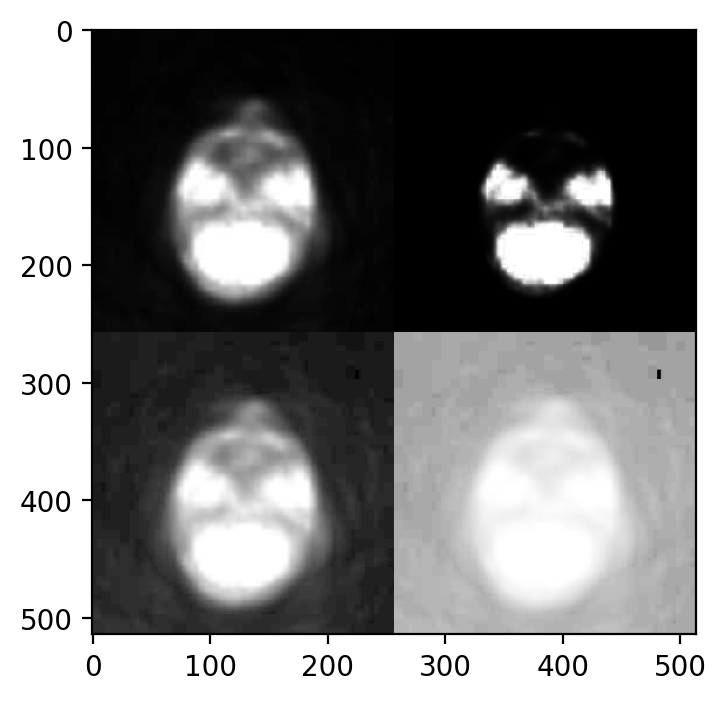

In [18]:
skull_norm_im = cvu.norm(skull_im.astype(np.float64), a_new=0, b_new=1)

skull_gamma2_im = cvu.gamma_correction(skull_norm_im, 2)
skull_gamma05_im = cvu.gamma_correction(skull_norm_im, 0.5)
skull_gamma01_im = cvu.gamma_correction(skull_norm_im, 0.1)

skull_final_im = cvu.concatenate([skull_norm_im*255, skull_gamma2_im, skull_gamma05_im, skull_gamma01_im], (2, 2))
plt.imshow(skull_final_im, cmap='gray')
plt.savefig('./images/contrast/skull1-gamma.jpeg', transparent=True)

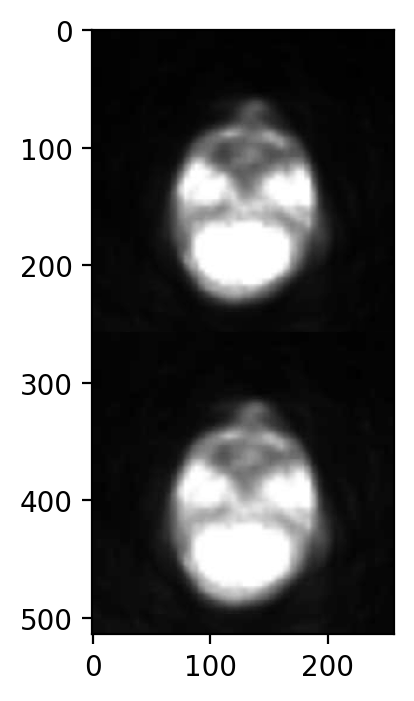

In [19]:
skull_norm_im = cvu.norm(skull_im.astype(np.float64), a_new=0, b_new=255)

skull_log_im = im_log_transformation(skull_norm_im)

skull_final_im = cvu.concatenate([skull_norm_im, skull_log_im], (2, 1))
plt.imshow(skull_final_im, cmap='gray')
plt.savefig('./images/contrast/skull1-log.png', transparent=True)

<AxesSubplot:>

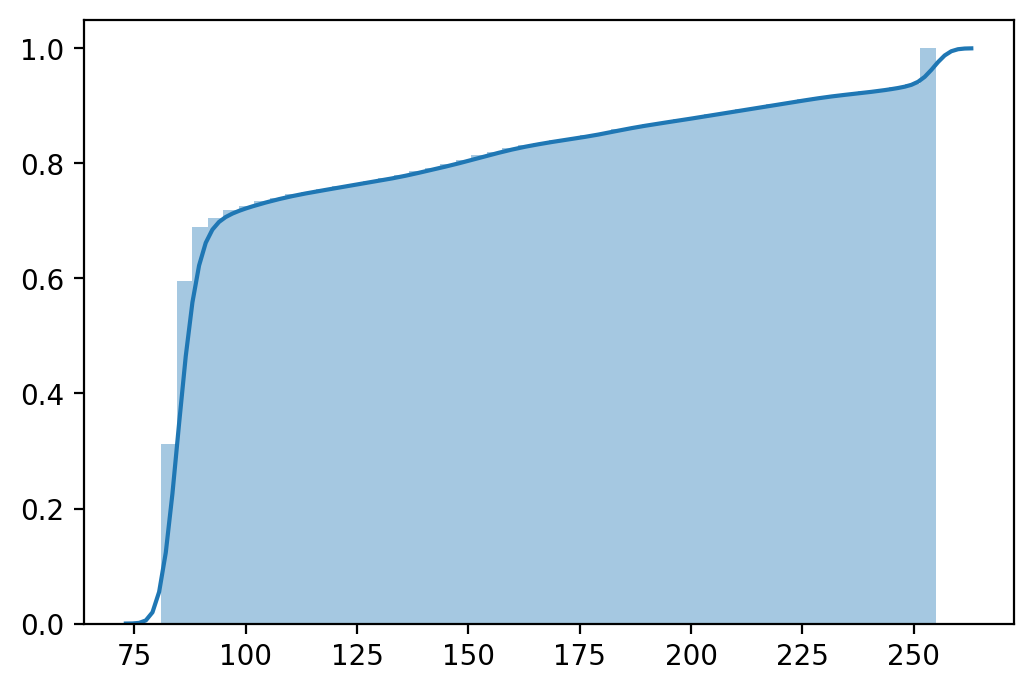

In [20]:
kwargs = {'cumulative': True}
sns.distplot(skull_im, hist_kws=kwargs, kde_kws=kwargs)

<AxesSubplot:>

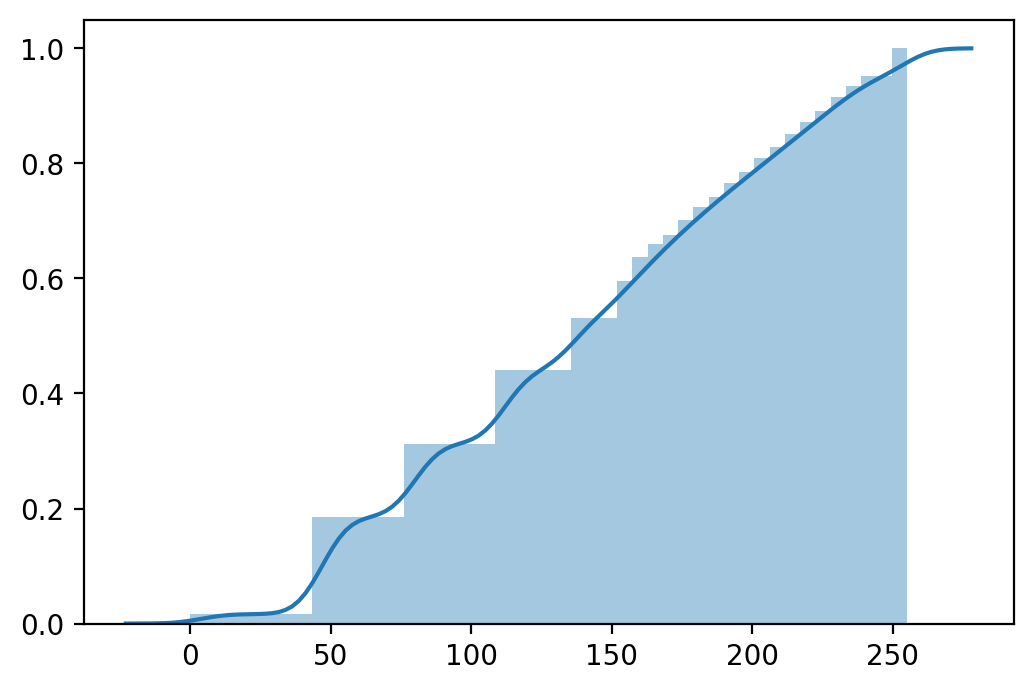

In [21]:

# df_skull = pd.DataFrame({'x': im_hist_equalization(skull_im.astype(np.int32)).reshape(1,-1)[0]})
kwargs = {'cumulative': True}
sns.distplot(cvu.hist_equalization(skull_norm_im.astype(np.int32)), hist_kws=kwargs, kde_kws=kwargs)

208.0
218.0


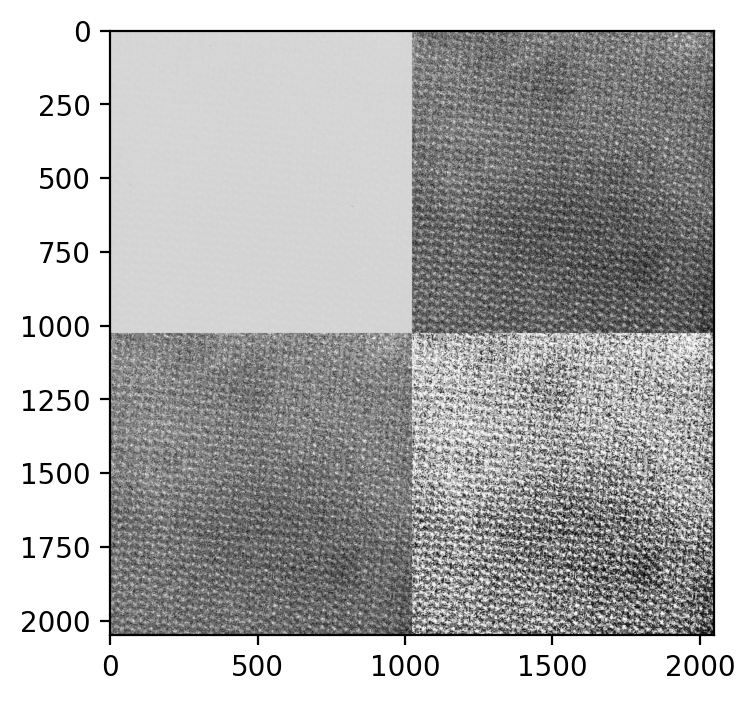

In [22]:
pale_pattern_im = cv2.imread('./images/contrast/pale-pattern1.jpeg', cv2.IMREAD_GRAYSCALE)
pale_pattern_pre_norm_im = cv2.imread('./images/contrast/pale-pattern1-contrast-normalized.png', cv2.IMREAD_GRAYSCALE)

pale_pattern_clip_im = cvu.clip(pale_pattern_im.astype(np.float64), a=208, b=218)

# pale_pattern_clip_im[pale_pattern_clip_im <= 213] = 254
print(pale_pattern_clip_im.min())
print(pale_pattern_clip_im.max())


pale_pattern_norm_im = cvu.norm(pale_pattern_clip_im).astype(np.uint8)
pale_pattern_hist_equ_im = cvu.hist_equalization(pale_pattern_norm_im.astype(np.int32))
# pale_pattern_norm_im = np.zeros_like(pale_pattern_clip_im)
# pale_pattern_norm_im = cv2.normalize(pale_pattern_clip_im,  pale_pattern_norm_im, 0, 255, cv2.NORM_MINMAX)
# pale_pattern_norm_im = (pale_pattern_clip_im - pale_pattern_clip_im.min()) / (pale_pattern_clip_im.max() - pale_pattern_clip_im.min()) * 255

pale_pattern_final_im = cvu.concatenate([pale_pattern_im, pale_pattern_pre_norm_im, pale_pattern_norm_im, pale_pattern_hist_equ_im], (2, 2))
plt.imshow(pale_pattern_final_im, cmap='gray')


<AxesSubplot:>

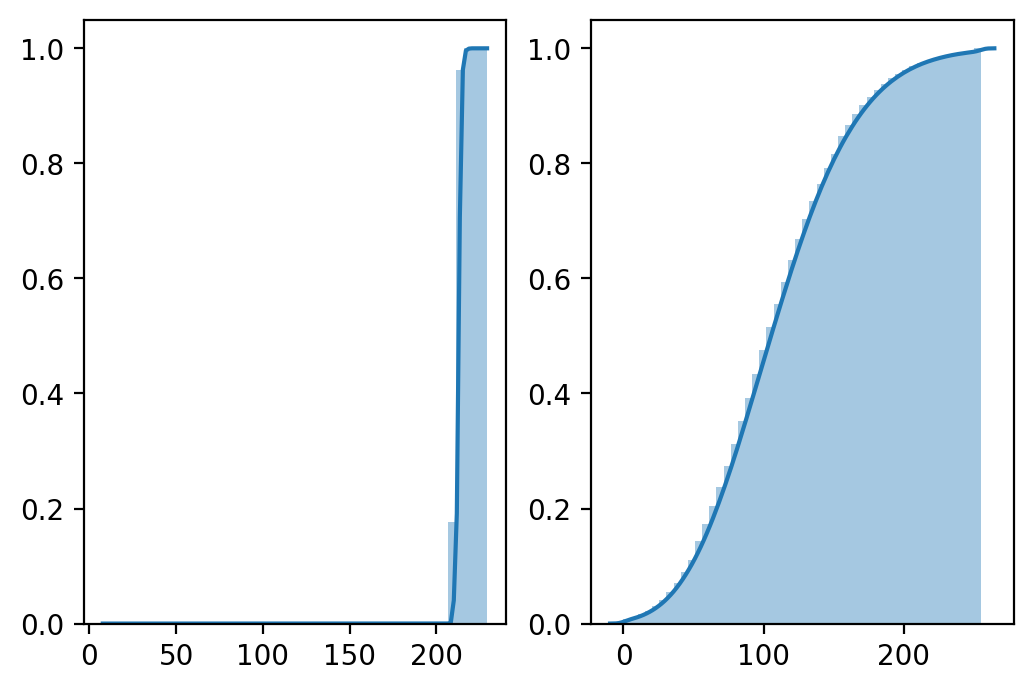

In [23]:
# fig, axes = plt.subplots(1, 2, sharex=True, figsize=(30, 10))

# for ax, image in zip(axes, [skull_im, skull_im_new]):
#         ax.imshow(image)
figure, axis = plt.subplots(1, 2)
kwargs = {'cumulative': True}
sns.distplot(pale_pattern_im.astype(np.int32), hist_kws=kwargs, kde_kws=kwargs, ax=axis[0])
sns.distplot(pale_pattern_pre_norm_im.astype(np.int32), hist_kws=kwargs, kde_kws=kwargs, ax=axis[1])
# sns.distplot(pale_pattern_norm_im.astype(np.int32), hist_kws=kwargs, kde_kws=kwargs, ax=axis[2])
# sns.distplot(pale_pattern_hist_equ_im.astype(np.int32), hist_kws=kwargs, kde_kws=kwargs, ax=axis[3])

<AxesSubplot:>

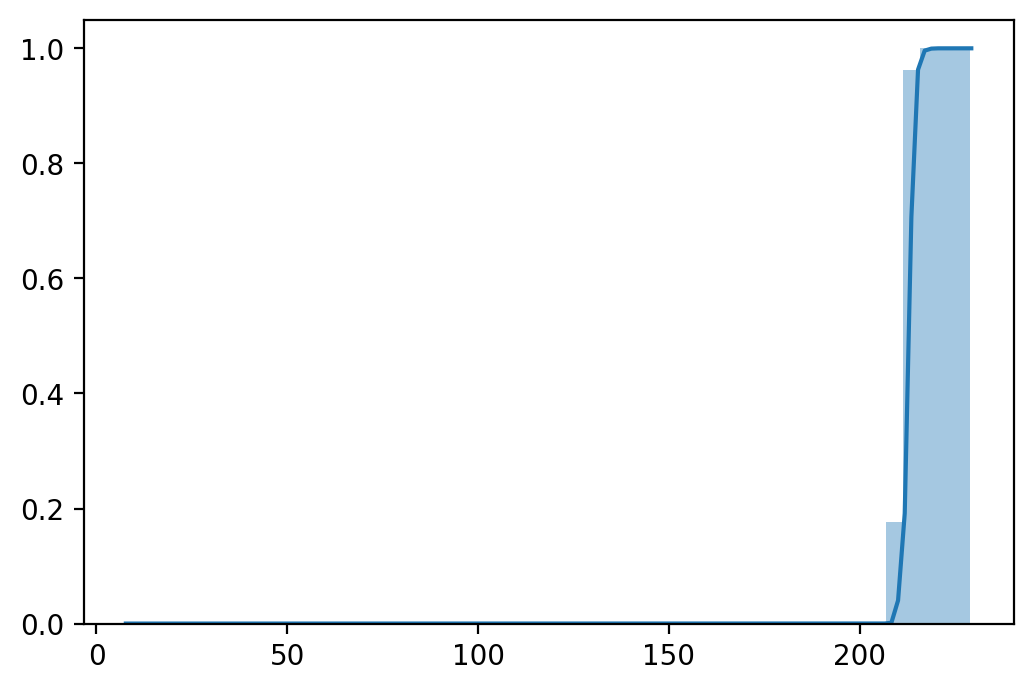

In [24]:
sns.distplot(pale_pattern_im.astype(np.int32), hist_kws=kwargs, kde_kws=kwargs)

# Histogram Matching